## Practica sobre K-Means y GMM

In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from  sklearn.mixture import GaussianMixture


In [190]:
base_data_or = pd.read_csv('estaturas.csv')

In [191]:
base_data = base_data_or.to_numpy()
#base_data

In [388]:

def kmeans(data,epochs = 5,k = 5,status=False, seed=False):
    if seed:
        random.seed(101)
    j = np.array([])
    total = len(data)
    # seleccion aleatoria de elementos como k iniciales
    randomlist = random.sample(range(0, total-1), k)
    listk = np.array([data[i] for i in randomlist])
    # registro para saber donde iniciaron los k
    init_k =  np.copy(listk)
    
    for i in range(epochs):
        # (x-x*)  (y - y*)
        diferencias = data[:,None]- listk

        # (x-x*)^2 + (y - y*)^2
        suma_cuadrados = np.sum(np.square(diferencias),axis=2)

        # distancia euclidiana sqrt( suma_cuadrados )
        distancia_euc = np.sqrt(suma_cuadrados)

        # seleccion del k con la distancia mas cercana
        assigned = np.argmin(distancia_euc,axis=1)
        #print(assigned)

        # sumatoria de las distancias minimas de cada elemento 
        #   :distancia_euc tiene todas las k-esimas distancias, 
        #   por eso se toma el minimo. en este caso
        j = np.append(j,sum(np.min(distancia_euc,axis=1))/total)
        if status:
            print(j[i])
        # reasignacion de k
        for i in range(k):
            # filtro del los datos para cada k
            subgrupo = data[assigned==i]
            # nuevo centroide de k
            listk[i] = np.average(subgrupo,axis=0)
    #print(j)
    
    return (listk,init_k,j, assigned)

### Con los datos crudos

In [414]:
ks,k_init,j,assigned = kmeans(base_data, epochs = 5,k = 5,status=True, seed=False)
print(ks)
print('J: ',j)

1.1340839873535546
1.0847258687549142
1.0847258687549142
1.0847258687549142
1.0847258687549142
[[ 1.79777778 26.        ]
 [ 1.68111111 30.88888889]
 [ 1.77166667 35.66666667]
 [ 1.768      23.2       ]
 [ 1.65       26.        ]]
J:  [1.13408399 1.08472587 1.08472587 1.08472587 1.08472587]


#### Grafica J

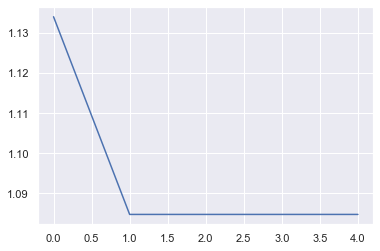

In [415]:
plt.plot(j)

##### Grafica de clusters
Se prepresenta el universo de elementos agrupados por colores y por medio de X los centroides definidos

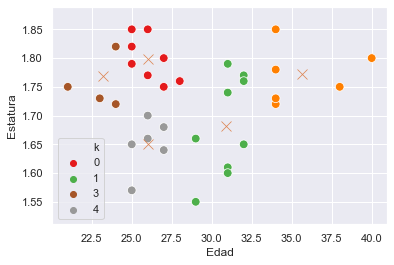

In [416]:
base_data_or['k'] = assigned
sns.scatterplot(x="Edad", y="Estatura",  palette="Set1",s=75,
                     hue="k", data=base_data_or)
# definicion de k
sns.scatterplot(x=ks[:,1], y=ks[:,0],  marker="x",s=100)
# puntos iniciales
#sns.scatterplot(x=init_k[:,1], y=init_k[:,0],  marker="s",s=75,color=".2" )

### Escalado de datos

In [417]:
esc_data = (base_data - np.min(base_data, axis=0))/ ( np.max(base_data, axis=0) - np.min(base_data, axis=0) )
esc_data[0:3]

array([[0.73333333, 0.26315789],
       [0.63333333, 0.52631579],
       [0.56666667, 0.15789474]])

In [489]:
ks,k_init,j,assigned = kmeans(esc_data, epochs = 5,k = 5,status=True,seed=False)
print(ks)
print('J: ',j)

0.18518823091674064
0.14478159946452407
0.13196121418194529
0.13007019090954955
0.13092045861958165
[[0.825      0.22368421]
 [0.18888889 0.44736842]
 [0.725      0.61842105]
 [0.44285714 0.23308271]
 [0.75       0.94736842]]
J:  [0.18518823 0.1447816  0.13196121 0.13007019 0.13092046]


#### Grafica J

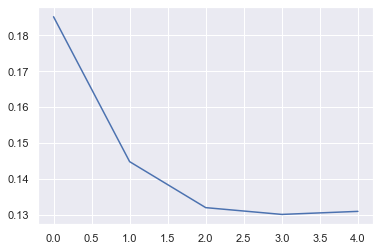

In [490]:
plt.plot(j)

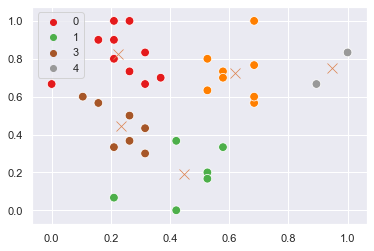

In [494]:
sns.scatterplot(x=esc_data[:,1], y=esc_data[:,0],  palette="Set1",s=75,
                     hue=assigned)
# definicion de k
sns.scatterplot(x=ks[:,1], y=ks[:,0],  marker="x",s=100)
# puntos iniciales
#sns.scatterplot(x=init_k[:,1], y=init_k[:,0],  marker="s",s=75,color=".2" )

En base diversas ejecuciones y por el medio elbow se estima que un buen k seria de 2, considerando que el algoritmo converve en menos de 5 epochs.

Aunque en varias ocuaciones elbow sugiere hacer un solo grupo; pero seria lo mismo que no hacer nada por lo que se deja la opcion de crear almenos 2 grupos

0.40469321492863886
0.2506812450719016
0.24813383764910393
0.24542337296742933
0.24158456591823274
J:  [0.40469321 0.25068125 0.24813384 0.24542337 0.24158457]


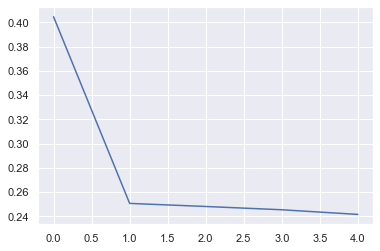

In [453]:
ks,k_init,j,assigned = kmeans(esc_data, epochs = 5,k = 2,status=True,seed=False)
print('J: ',j)
plt.plot(j)

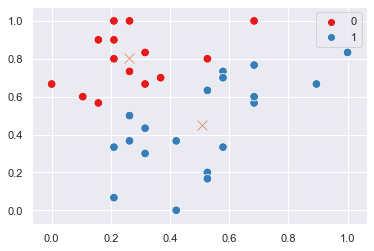

In [454]:
sns.scatterplot(x=esc_data[:,1], y=esc_data[:,0],  palette="Set1",s=75,
                     hue=assigned)
# definicion de k
sns.scatterplot(x=ks[:,1], y=ks[:,0],  marker="x",s=100)

### GMM

In [ ]:
gmm = G